In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%qtconsole

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from ripple_detection import Karlsson_ripple_detector, Kay_ripple_detector

In [3]:
def simulate_time(n_samples, sampling_frequency):
    return np.arange(n_samples) / sampling_frequency

SAMPLING_FREQUENCY = 1000
n_samples = SAMPLING_FREQUENCY * 3
time = simulate_time(n_samples, SAMPLING_FREQUENCY)
white_noise = np.random.normal(size=time.shape)
RIPPLE_FREQUENCY = 200
ripple_power = np.sin(2 * np.pi * time * RIPPLE_FREQUENCY)
carrier = scipy.stats.norm(loc=1.1, scale=0.025).pdf(time)
carrier /= carrier.max()

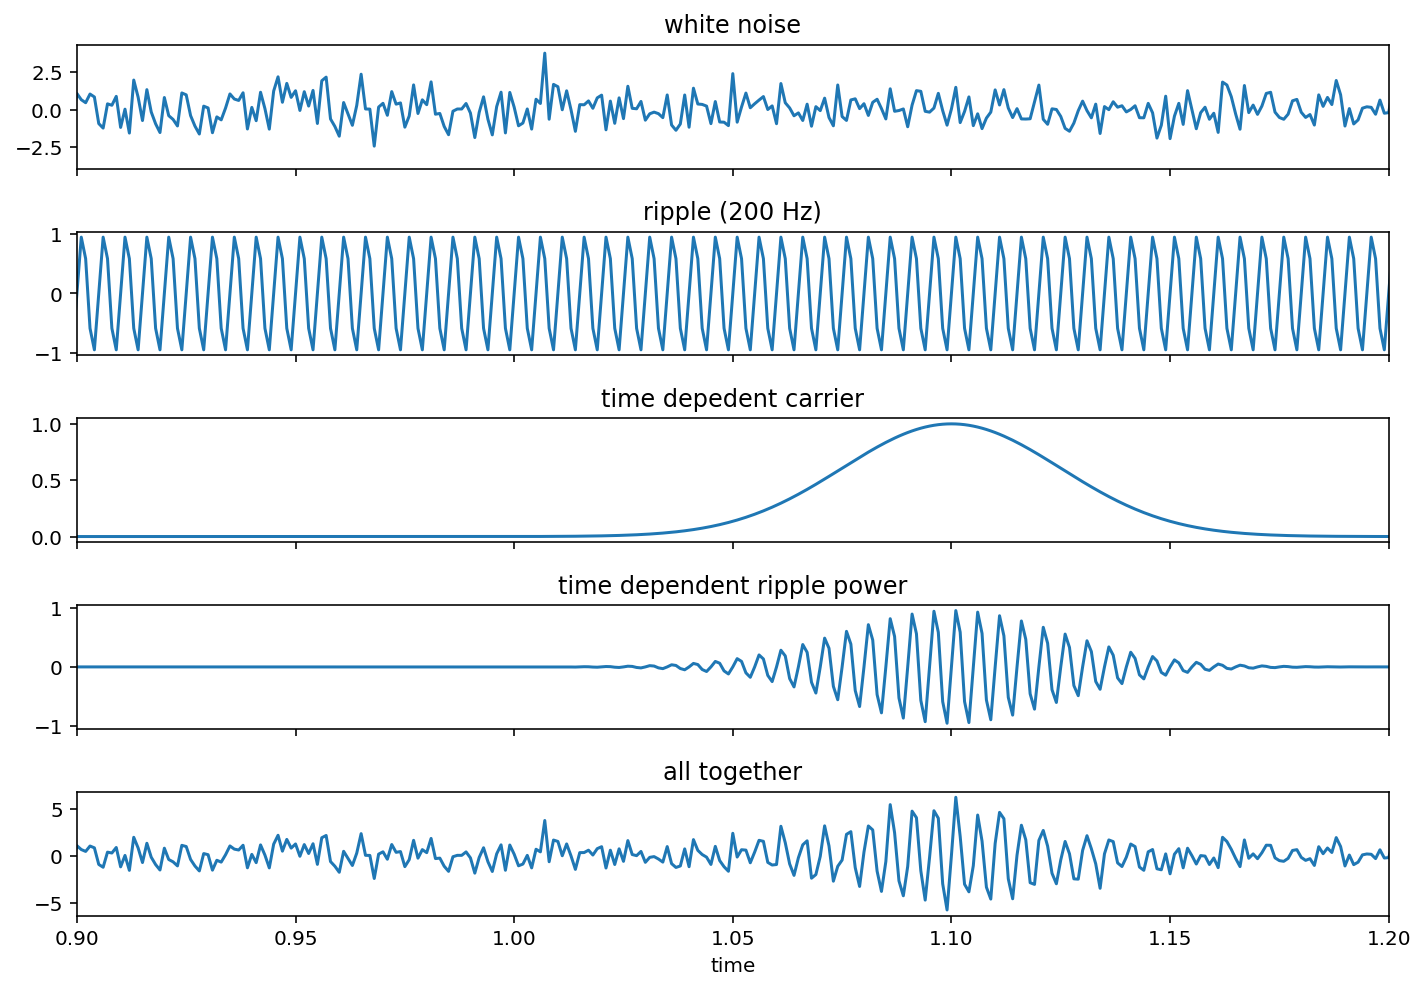

In [4]:
f, ax = plt.subplots(5, 1, sharex=True, figsize=(10, 7))
ax[0].plot(time, white_noise)
ax[0].set_title('white noise')
ax[1].plot(time, ripple_power)
ax[1].set_title('ripple (200 Hz)')
ax[2].plot(time, carrier)
ax[2].set_title('time depedent carrier')
ax[3].plot(time, (ripple_power * carrier));
ax[3].set_title('time dependent ripple power')
ax[4].plot(time, 5 * (ripple_power * carrier) + white_noise);
ax[4].set_title('all together')
ax[4].set_xlabel('time')

plt.xlim(0.9, 1.2)
plt.tight_layout()

(0.9, 2.2)

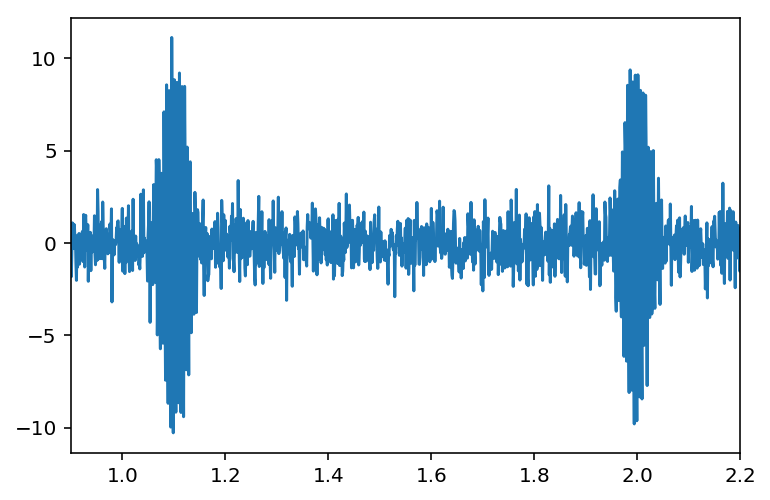

In [5]:
def simulate_signal(time, ripple_times, ripple_amplitude=5, ripple_std_dev=0.025, noise_std_dev=1):
    RIPPLE_FREQUENCY = 200
    
    white_noise = np.random.normal(scale=noise_std_dev, size=time.shape)
    ripple_power = np.sin(2 * np.pi * time * RIPPLE_FREQUENCY)
    signal = []
    
    try:
        iter(ripple_times)
    except TypeError:
        ripple_times = [ripple_times]
    
    for ripple_time in ripple_times:
        carrier = scipy.stats.norm(loc=ripple_time, scale=ripple_std_dev).pdf(time)
        carrier /= carrier.max()
        signal.append(ripple_amplitude * (ripple_power * carrier))
    
    return np.sum(signal, axis=0) + white_noise

plt.plot(time, simulate_signal(time, [1.1, 2], ripple_amplitude=10, ripple_std_dev=0.025))
plt.xlim(0.9, 2.2)

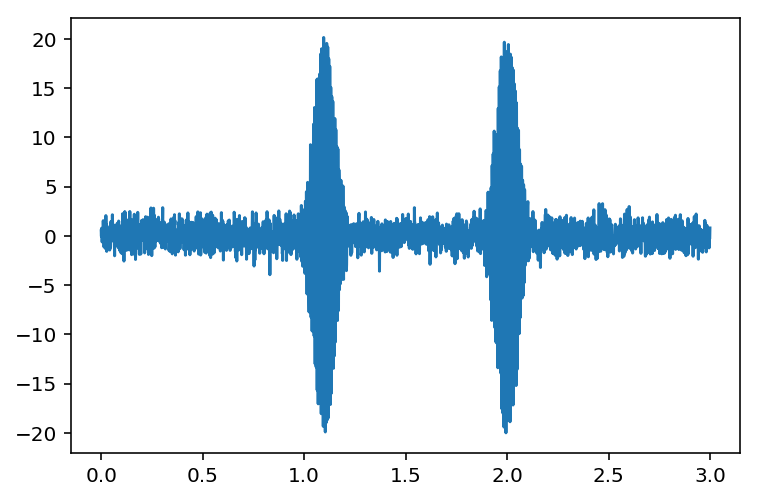

In [7]:
LFPs = simulate_signal(time, [1.1, 2], ripple_amplitude=20, ripple_std_dev=0.050)[:, np.newaxis]
plt.plot(time, LFPs)
speed = np.ones_like(time)

,start_time,end_time
ripple_number,,
1,0.999,1.209
2,1.895,2.101


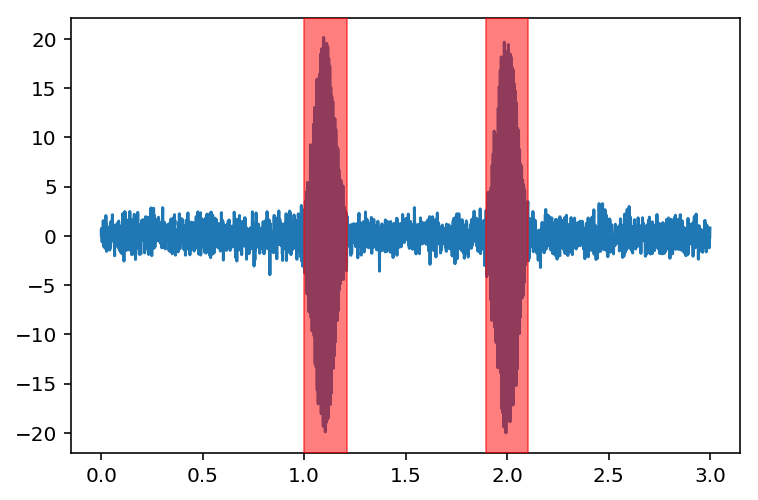

In [8]:
Karlsson_ripple_times = Karlsson_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Karlsson_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.5, color='red', zorder=1000)

,start_time,end_time
ripple_number,,
1,0.999,1.210
2,1.895,2.101


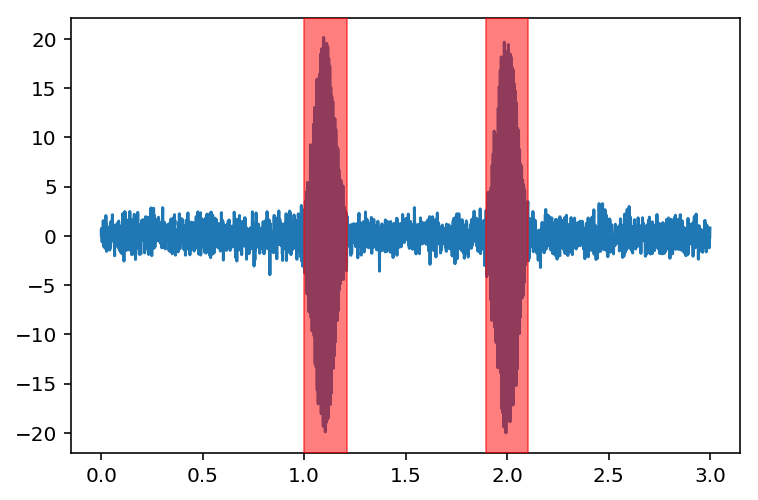

In [24]:
Kay_ripple_times = Kay_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.5, color='red', zorder=1000)

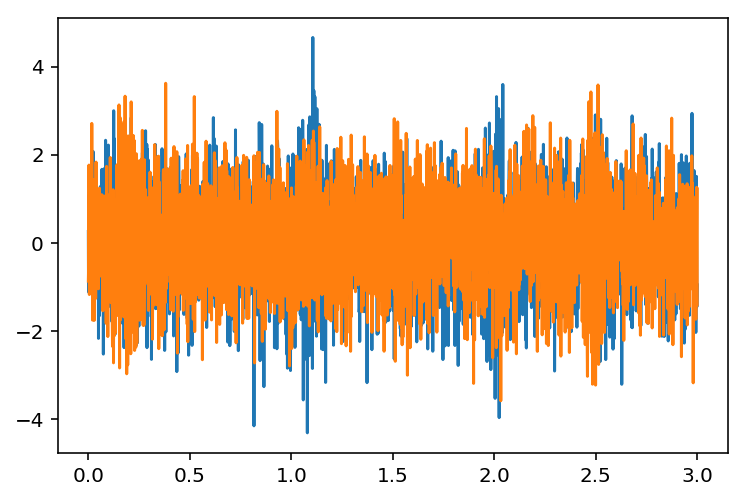

In [46]:
LFPs = np.stack(
    (simulate_signal(time, [1.1, 2], ripple_amplitude=2, ripple_std_dev=0.050),
    simulate_signal(time, [0.2, 2.5], ripple_amplitude=2, ripple_std_dev=0.050)),axis=1)
plt.plot(time, LFPs)
speed = np.ones_like(time)

,start_time,end_time
ripple_number,,
1,0.114,0.278
2,1.025,1.175
3,1.946,2.085
4,2.450,2.565


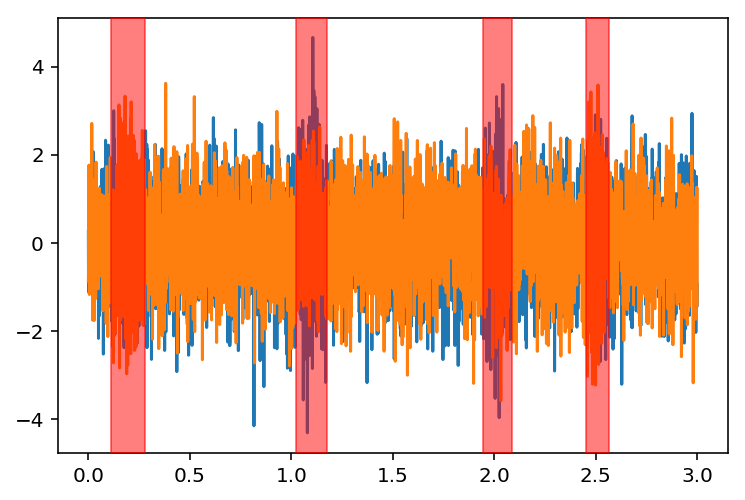

In [47]:
Karlsson_ripple_times = Karlsson_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Karlsson_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.5, color='red', zorder=1000)

,start_time,end_time
ripple_number,,
1,0.123,0.244
2,1.041,1.157
3,1.943,1.988
4,1.993,2.049
5,2.452,2.542


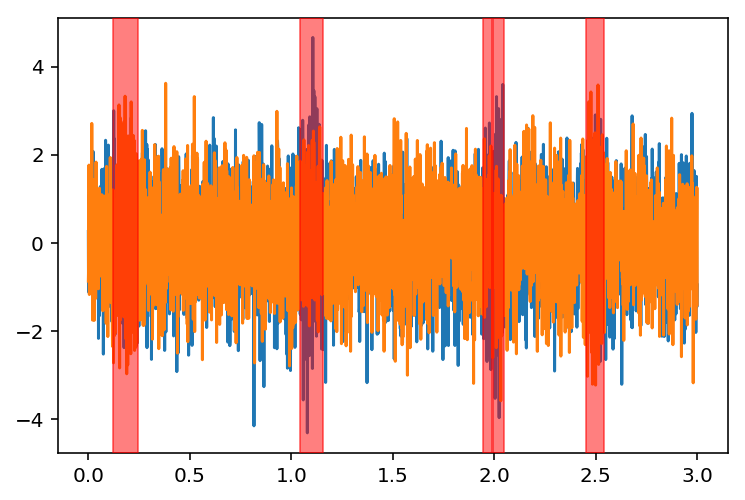

In [48]:
Kay_ripple_times = Kay_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.5, color='red', zorder=1000)

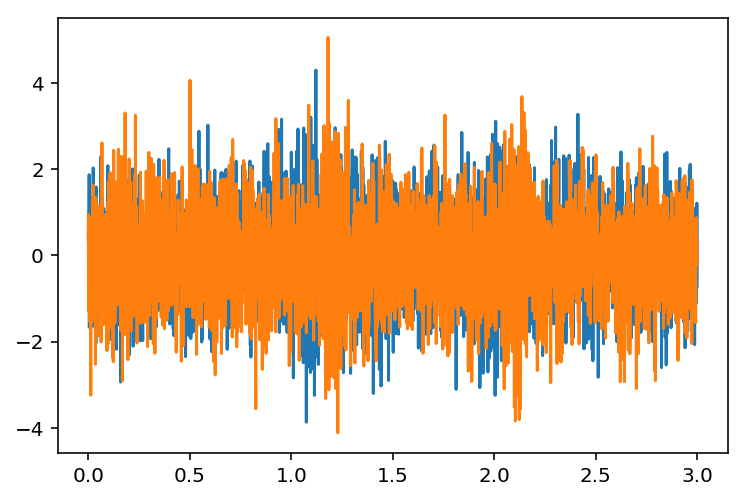

In [49]:
LFPs = np.stack(
    (simulate_signal(time, [1.1, 2], ripple_amplitude=2, ripple_std_dev=0.050),
    simulate_signal(time, [1.2, 2.1], ripple_amplitude=2, ripple_std_dev=0.050)),axis=1)
plt.plot(time, LFPs)
speed = np.ones_like(time)

,start_time,end_time
ripple_number,,
1,1.045,1.285
2,1.906,2.178


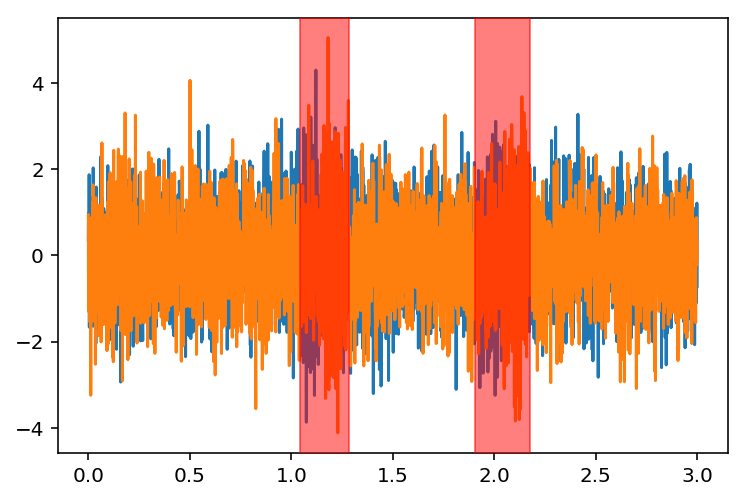

In [50]:
Karlsson_ripple_times = Karlsson_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Karlsson_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.5, color='red', zorder=1000)

,start_time,end_time
ripple_number,,
1,1.044,1.286
2,1.953,2.155


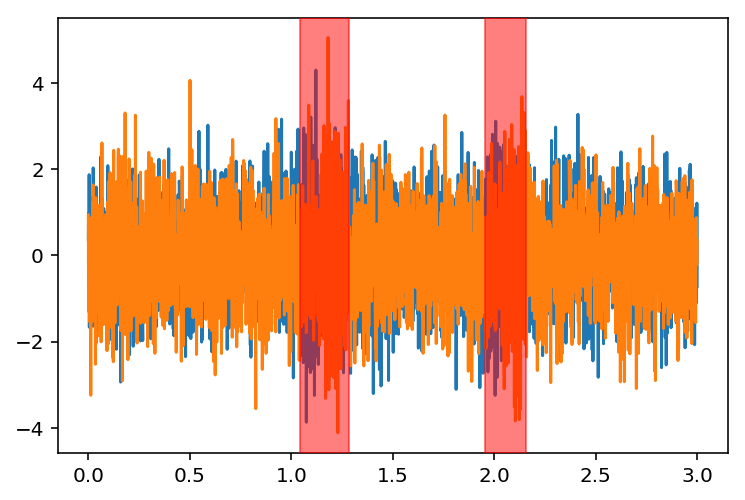

In [51]:
Kay_ripple_times = Kay_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.5, color='red', zorder=1000)

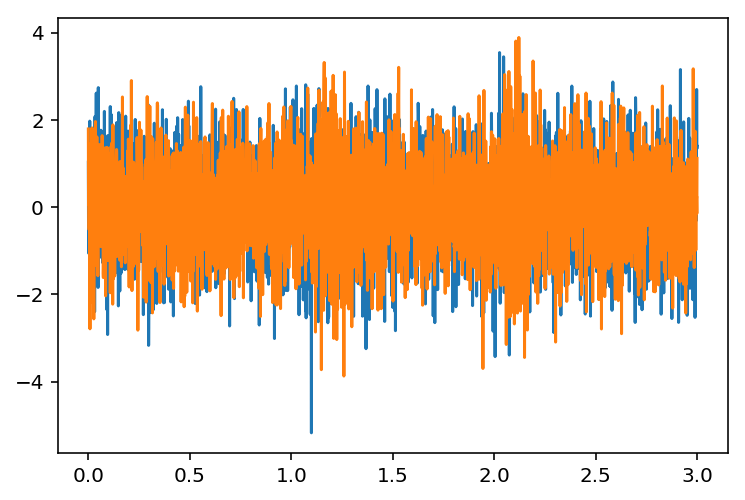

In [58]:
LFPs = np.stack(
    (simulate_signal(time, [1.1, 2], ripple_amplitude=1.15, ripple_std_dev=0.050),
    simulate_signal(time, [1.2, 2.1], ripple_amplitude=2, ripple_std_dev=0.050)),axis=1)
plt.plot(time, LFPs)
speed = np.ones_like(time)

,start_time,end_time
ripple_number,,
1,1.020,1.290
2,2.016,2.176


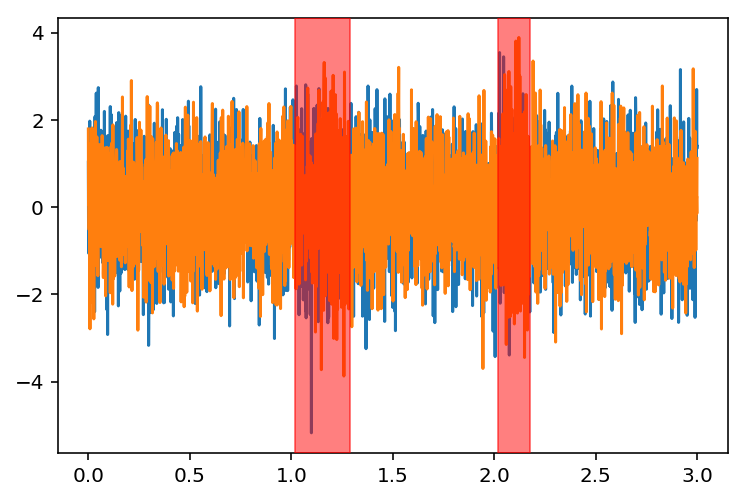

In [60]:
Karlsson_ripple_times = Karlsson_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Karlsson_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.5, color='red', zorder=1000)

,start_time,end_time
ripple_number,,
1,1.067,1.242
2,1.980,2.173


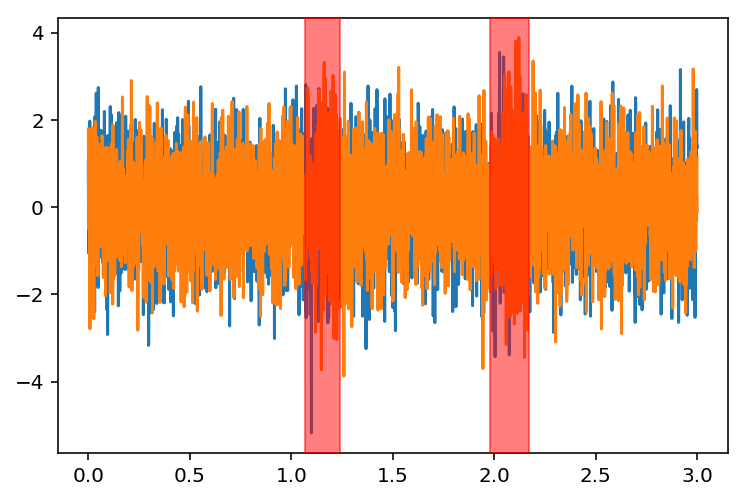

In [61]:
Kay_ripple_times = Kay_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.5, color='red', zorder=1000)

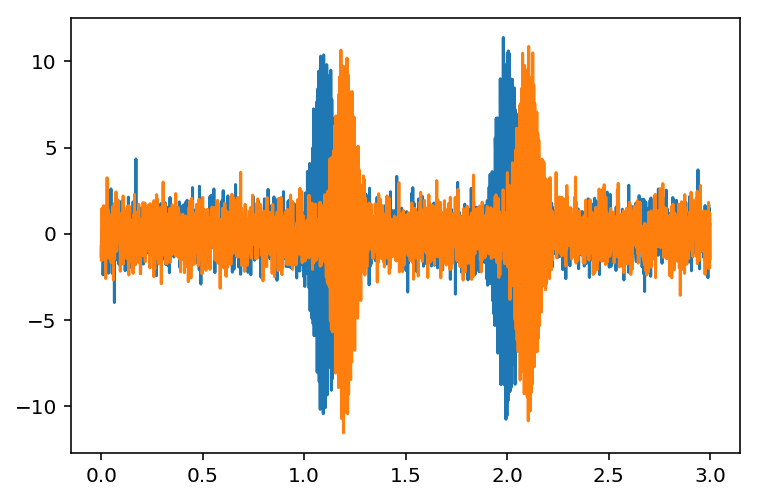

In [62]:
LFPs = np.stack(
    (simulate_signal(time, [1.1, 2], ripple_amplitude=10, ripple_std_dev=0.050),
    simulate_signal(time, [1.2, 2.1], ripple_amplitude=10, ripple_std_dev=0.050)),axis=1)
plt.plot(time, LFPs)
speed = np.ones_like(time)
speed[time > 1.5] = 5

,start_time,end_time
ripple_number,,
1,0.997,1.302


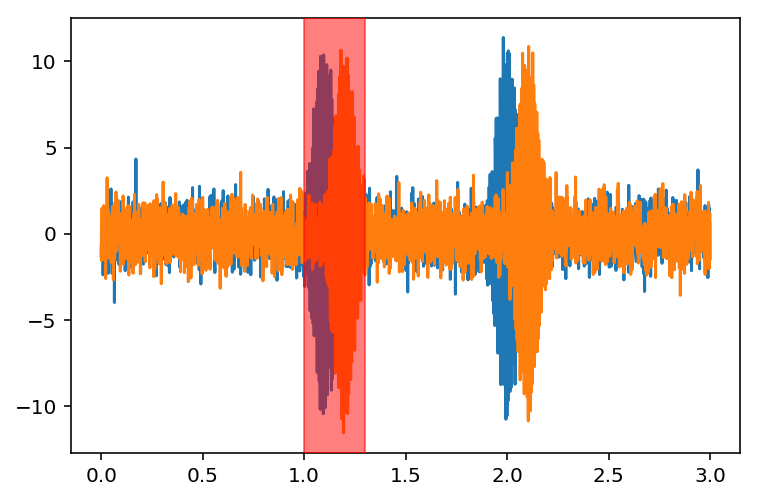

In [63]:
Karlsson_ripple_times = Karlsson_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Karlsson_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Karlsson_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.5, color='red', zorder=1000)

,start_time,end_time
ripple_number,,
1,1.015,1.28


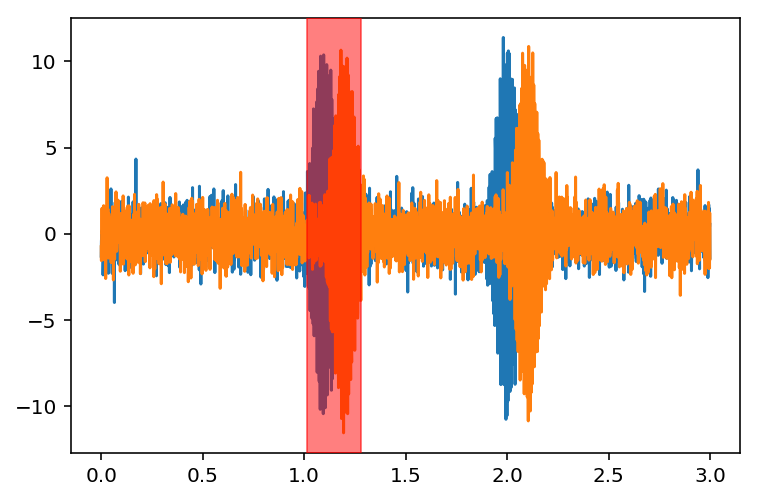

In [64]:
Kay_ripple_times = Kay_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

display(Kay_ripple_times)

f, ax = plt.subplots()
ax.plot(time, LFPs)
for ripple in Kay_ripple_times.itertuples():
    ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.5, color='red', zorder=1000)